In [10]:
import numpy as np
from numpy.linalg import solve, norm, pinv
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
import networkx as nx
from matplotlib.animation import FuncAnimation
from scipy.linalg import solve



A = np.array([
    [0, 0, 1/2, 1/2, 0],
    [1/3, 0, 0, 0, 0],
    [1/3, 1/2, 0, 1/2, 1],
    [1/3, 1/2, 0, 0, 0],
    [0, 0, 1/2, 0, 0]
], dtype=float)

n = A.shape[0]
S = np.ones((n, n)) / n
v0 = np.ones(n) / n 

def pagerank_power_method(M, v0, max_iter=1000, tol=1e-12):
    v = v0 / v0.sum()  # Normalizzazione L1 iniziale

    for _ in range(max_iter):
        v_new = M @ v
        v_new = v_new / v_new.sum()  # Normalizzazione L1
        
        # Criterio di arresto basato sulla norma L1
        if np.linalg.norm(v_new - v, 1) < tol:
            return v_new

        v = v_new
    return v


def plot_pagerank(m):
    # Ricalcola la matrice Google M per il nuovo valore di m
    M = (1 - m) * A + m * S
    
    # Ricalcola il vettore PageRank v
    v = pagerank_power_method(M, v0)

    # Generazione del grafico
    plt.figure(figsize=(7,4))
    plt.bar(range(1, n+1), v, color='blue')
    plt.ylim(0, 0.5)
    plt.xlabel('Pagina')
    plt.ylabel('Rank')
    plt.title(f'PageRank (m = {m:.2f})')
    for i, val in enumerate(v):
        plt.text(i+1, val+0.01, f'{val:.3f}', ha='center')
    plt.show()

interact(plot_pagerank, m=FloatSlider(value=0.15, min=0, max=1, step=0.01, description='m'));

interactive(children=(FloatSlider(value=0.15, description='m', max=1.0, step=0.01), Output()), _dom_classes=('…

In [23]:
A = np.array([
    [0,   0,   1/2, 1/2, 0],
    [1/3, 0,   0,   0,   0],
    [1/3, 1/2, 0,   1/2, 1],
    [1/3, 1/2, 0,   0,   0],
    [0,   0,   1/2, 0,   0]
], dtype=float)

n = A.shape[0]
S = np.ones((n, n)) / n     # matrice di teleportazione uniforme


# -------------------------------------------------------------------
# 2. Power Method Classico 
# -------------------------------------------------------------------

def pagerank_power_method_classic(m, max_iter=1000, tol=1e-10):
    # Matrice PageRank
    M = (1 - m) * A + m * S

    # Vettore iniziale
    v = np.ones(n)
    v /= np.linalg.norm(v, 2)

    # Quoziente di Rayleigh precedente (inizializzato a infinito)
    lam_old = np.inf

    for _ in range(max_iter):
        w = M @ v
        v = w / np.linalg.norm(w, 2)

        # Quoziente di Rayleigh attuale
        lam = v.T @ (M @ v)

        # Criterio di convergenza
        if abs(lam - lam_old) < tol * max(abs(lam), 1e-12):
            break

        lam_old = lam

    # Conversione finale a distribuzione di probabilità (L1)
    v = v / v.sum()

    return lam, v


# -------------------------------------------------------------------
# 3. Plot del risultato del Power Method Classico
# -------------------------------------------------------------------

def plot_pagerank_classic(m):
    lam, v = pagerank_power_method_classic(m)

    plt.figure(figsize=(7, 4))
    plt.bar(range(1, n+1), v)
    plt.ylim(0, 0.5)
    plt.xlabel('Pagina')
    plt.ylabel('Rank')
    plt.title(f'Classic Power Method – PageRank (m = {m:.2f})')

    # Etichette valori
    for i, val in enumerate(v):
        plt.text(i+1, val + 0.01, f"{val:.3f}", ha='center')

    plt.show()


# -------------------------------------------------------------------
# 4. Interfaccia interattiva
# -------------------------------------------------------------------

interact(
    plot_pagerank_classic,
    m=FloatSlider(value=0.15, min=0.0, max=1.0, step=0.01, description='m')
);

interactive(children=(FloatSlider(value=0.15, description='m', max=1.0, step=0.01), Output()), _dom_classes=('…

Iterazioni: 54
Residuo finale: 1.77e-12


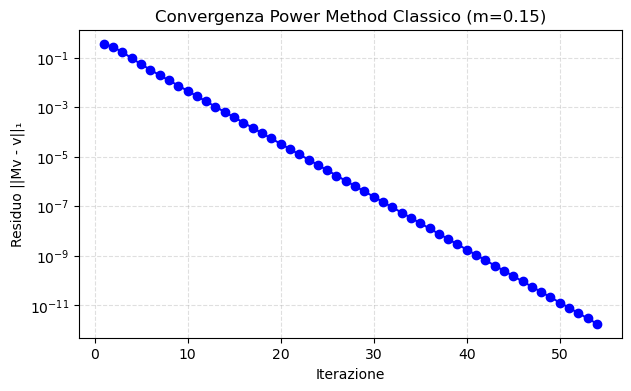

In [21]:
A = np.array([
    [0, 0, 1/2, 1/2, 0],
    [1/3, 0, 0, 0, 0],
    [1/3, 1/2, 0, 1/2, 1],
    [1/3, 1/2, 0, 0, 0],
    [0, 0, 1/2, 0, 0]
], dtype=float)

n = A.shape[0]
S = np.ones((n,n)) / n

# ------------------------------
# Power Method Classico (residuo L1)
# ------------------------------
def power_method_classic_resid(M, max_iter=1000, tol=1e-12):
    v = np.ones(n)
    v /= norm(v,2)
    lam_old = np.inf
    resid_hist = []

    for _ in range(max_iter):
        w = M @ v
        v = w / norm(w,2)
        v_prob = v / v.sum()  # versione L1 per residuo
        resid = norm(M @ v_prob - v_prob, 1)
        resid_hist.append(resid)
        lam = v.T @ (M @ v)
        if abs(lam - lam_old) < tol * max(abs(lam),1e-14):
            break
        lam_old = lam

    return resid_hist

# ------------------------------
# Analisi del residuo
# ------------------------------
def analyze_residuum(m=0.15):
    M = (1-m)*A + m*S
    resid_hist = power_method_classic_resid(M)
    print(f"Iterazioni: {len(resid_hist)}")
    print(f"Residuo finale: {resid_hist[-1]:.2e}")

    plt.figure(figsize=(7,4))
    plt.semilogy(range(1,len(resid_hist)+1), resid_hist, marker='o', color='blue')
    plt.xlabel('Iterazione')
    plt.ylabel('Residuo ||Mv - v||₁')
    plt.title(f'Convergenza Power Method Classico (m={m:.2f})')
    plt.grid(True, which='both', ls='--', alpha=0.4)
    plt.show()

# ------------------------------
# Esecuzione esempio
# ------------------------------
analyze_residuum(m=0.15)

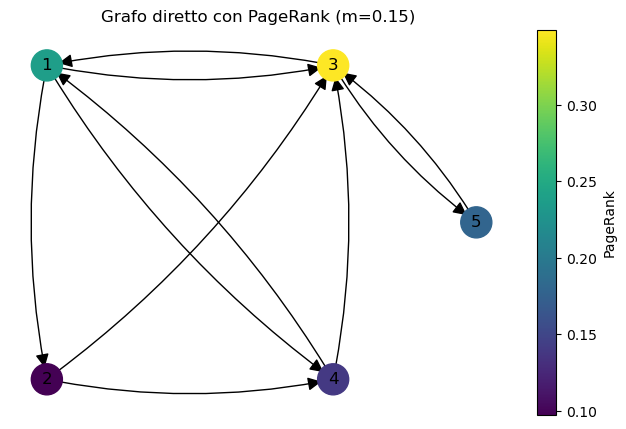

In [6]:
# Matrice di adiacenza
A = np.array([
    [0,   0,   1/2, 1/2, 0],
    [1/3, 0,   0,   0,   0],
    [1/3, 1/2, 0,   1/2, 1],
    [1/3, 1/2, 0,   0,   0],
    [0,   0,   1/2, 0,   0]
])

n = A.shape[0]

# Calcolo PageRank con eig
m = 0.15
S = np.ones((n,n))/n
M = (1-m)*A + m*S
autovalori, autovettori = np.linalg.eig(M)
idx = np.argmin(np.abs(autovalori - 1))
v = autovettori[:, idx].real
if np.sum(v) < 0:
    v = -v
v = v / np.sum(v)

# Creazione grafo diretto
G = nx.DiGraph()
G.add_nodes_from(range(1,n+1))

for i in range(n):
    for j in range(n):
        if A[i,j] > 0:
            G.add_edge(j+1, i+1)

# Posizioni manuali: quadrato + nodo 5 fuori
pos = {
    1: (0, 1),     # alto sx
    3: (1, 1),     # alto dx
    2: (0, 0),     # basso sx
    4: (1, 0),     # basso dx
    5: (1.5, 0.5)  # centro fuori a destra
}

# Normalizza PageRank per color mapping
norm = plt.Normalize(v.min(), v.max())
node_colors = plt.cm.viridis(norm(v))  # colormap

# --- Disegno grafo con figure e axes espliciti ---
fig, ax = plt.subplots(figsize=(8,5))

nx.draw_networkx_nodes(G, pos, node_size=500, node_color=node_colors, ax=ax)
nx.draw_networkx_labels(G, pos, ax=ax)

for (u,v_) in G.edges():
    nx.draw_networkx_edges(G, pos, edgelist=[(u,v_)],
                           connectionstyle='arc3,rad=0.1',
                           arrowstyle='-|>', arrowsize=20,
                           ax=ax)

# Colorbar corretta
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array(v)
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('PageRank')

ax.set_title(f'Grafo diretto con PageRank (m={m})')
ax.axis('off')
plt.show()

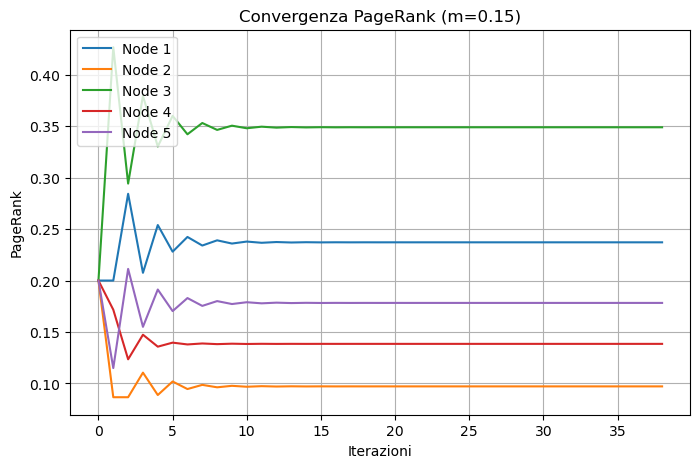

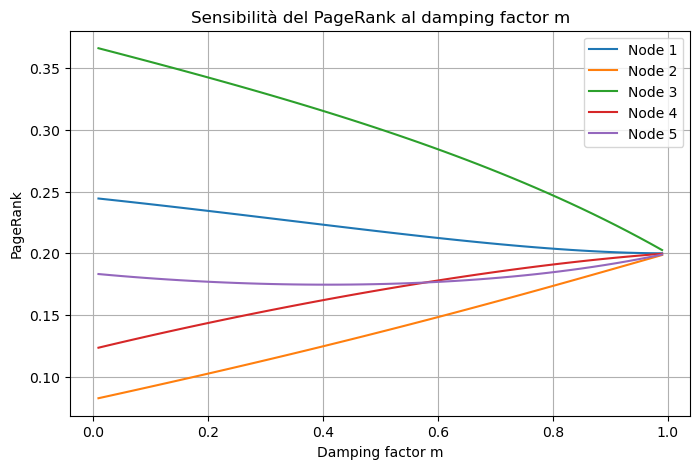

In [7]:
# Matrice di adiacenza
A = np.array([
    [0,   0,   1/2, 1/2, 0],
    [1/3, 0,   0,   0,   0],
    [1/3, 1/2, 0,   1/2, 1],
    [1/3, 1/2, 0,   0,   0],
    [0,   0,   1/2, 0,   0]
])
n = A.shape[0]

# Power iteration per calcolare PageRank
def pagerank_power_iteration(A, m=0.15, tol=1e-8, max_iter=100):
    n = A.shape[0]
    S = np.ones((n,n))/n
    M = (1-m)*A + m*S
    v = np.ones(n)/n
    history = [v.copy()]
    for _ in range(max_iter):
        v_new = M @ v
        history.append(v_new.copy())
        if np.linalg.norm(v_new - v, 1) < tol:
            break
        v = v_new
    return v, np.array(history)

# --- Analisi dinamica della convergenza per un m fisso ---
m_fixed = 0.15
v_final, history = pagerank_power_iteration(A, m=m_fixed)
iterations = history.shape[0]

plt.figure(figsize=(8,5))
for i in range(n):
    plt.plot(range(iterations), history[:,i], label=f'Node {i+1}')
plt.xlabel('Iterazioni')
plt.ylabel('PageRank')
plt.title(f'Convergenza PageRank (m={m_fixed})')
plt.legend()
plt.grid(True)
plt.show()

# --- Analisi sensibilità al damping factor m ---
m_values = np.linspace(0.01, 0.99, 50)
pagerank_vs_m = []

for m_val in m_values:
    v, _ = pagerank_power_iteration(A, m=m_val)
    pagerank_vs_m.append(v)
pagerank_vs_m = np.array(pagerank_vs_m)

plt.figure(figsize=(8,5))
for i in range(n):
    plt.plot(m_values, pagerank_vs_m[:,i], label=f'Node {i+1}')
plt.xlabel('Damping factor m')
plt.ylabel('PageRank')
plt.title('Sensibilità del PageRank al damping factor m')
plt.legend()
plt.grid(True)
plt.show()

In [8]:

# Matrice di adiacenza
A = np.array([
    [0,   0,   1/2, 1/2, 0],
    [1/3, 0,   0,   0,   0],
    [1/3, 1/2, 0,   1/2, 1],
    [1/3, 1/2, 0,   0,   0],
    [0,   0,   1/2, 0,   0]
])
n = A.shape[0]

# Funzione power iteration
def pagerank_power_iteration(A, m=0.15, tol=1e-8, max_iter=100):
    n = A.shape[0]
    S = np.ones((n,n))/n
    M = (1-m)*A + m*S
    v = np.ones(n)/n
    history = [v.copy()]
    for _ in range(max_iter):
        v_new = M @ v
        history.append(v_new.copy())
        if np.linalg.norm(v_new - v, 1) < tol:
            break
        v = v_new
    return np.array(history)

# Funzione per disegnare il grafico della convergenza per un dato m
def plot_convergence(m=0.15):
    history = pagerank_power_iteration(A, m=m)
    iterations = history.shape[0]
    
    plt.figure(figsize=(8,5))
    for i in range(n):
        plt.plot(range(iterations), history[:,i], label=f'Node {i+1}')
    plt.xlabel('Iterazioni')
    plt.ylabel('PageRank')
    plt.title(f'Convergenza PageRank (m={m:.2f})')
    plt.legend()
    plt.grid(True)
    plt.show()

# Slider interattivo per m
interact(plot_convergence, m=FloatSlider(value=0.15, min=0.01, max=0.99, step=0.01));


interactive(children=(FloatSlider(value=0.15, description='m', max=0.99, min=0.01, step=0.01), Output()), _dom…

In [9]:
# --- Matrici ---
A5 = np.array([
    [0,   0,   1/2, 1/2, 0],
    [1/3, 0,   0,   0,   0],
    [1/3, 1/2, 0,   1/2, 1],
    [1/3, 1/2, 0,   0,   0],
    [0,   0,   1/2, 0,   0]
])

A4 = np.array([
    [0,   0,   1/2, 1/2],
    [1/3, 0,   0,   0],
    [1/3, 1/2, 0,   1/2],
    [1/3, 1/2, 0,   0]
])

nodes = ['1','2','3','4']

def pagerank_eig(A, m):
    n = A.shape[0]
    S = np.ones((n,n))/n
    M = (1-m)*A + m*S
    autovalori, autovettori = np.linalg.eig(M)
    idx = np.argmin(np.abs(autovalori - 1))
    v = autovettori[:, idx].real
    if np.sum(v) < 0:
        v = -v
    return v / np.sum(v)

def plot_pagerank_comparison(m=0.15):
    v5 = pagerank_eig(A5, m)
    v4 = pagerank_eig(A4, m)
    
    x = np.arange(len(nodes))
    width = 0.35
    
    fig, ax = plt.subplots(figsize=(8,5))
    ax.bar(x - width/2, v5[:4], width, label='Con pagina 5')
    ax.bar(x + width/2, v4, width, label='Senza pagina 5')
    ax.set_xticks(x)
    ax.set_xticklabels(nodes)
    ax.set_ylabel('PageRank')
    ax.set_title(f'Confronto PageRank: con 5 pagine vs senza pagina 5 (m={m:.2f})')
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Slider interattivo per m
interact(plot_pagerank_comparison,
         m=FloatSlider(value=0.15, min=0.01, max=0.99, step=0.01, description='Damping factor m'));


interactive(children=(FloatSlider(value=0.15, description='Damping factor m', max=0.99, min=0.01, step=0.01), …